In [1]:
%cd ..

e:\e2e-MLOps-Pipeline-With-GitHub-Actions


# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import torch
import torch.nn as nn
import torch.optim as optim


In [3]:
import random

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Reading and handling data

In [4]:
df=pd.read_csv('dataset/Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df=df.drop(['PassengerId','Cabin','Name','Ticket','Embarked'],axis=1)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# visualize data

In [12]:
sns.set(style="whitegrid")

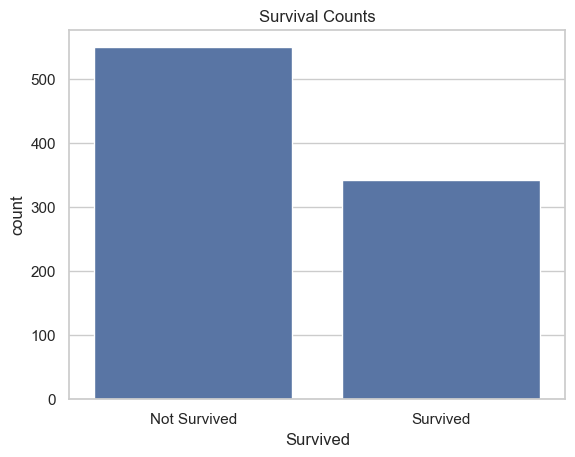

In [13]:
sns.countplot(x="Survived",data=df)
plt.title("Survival Counts")
plt.xticks([0,1],["Not Survived","Survived"])
plt.show()

In [14]:
def countplot(df,x):
    sns.countplot(x=x ,hue='Survived',data=df)
    plt.title(f"Survival Counts by {x}")
    plt.legend(['Not Survived','Survived'])
    plt.show()

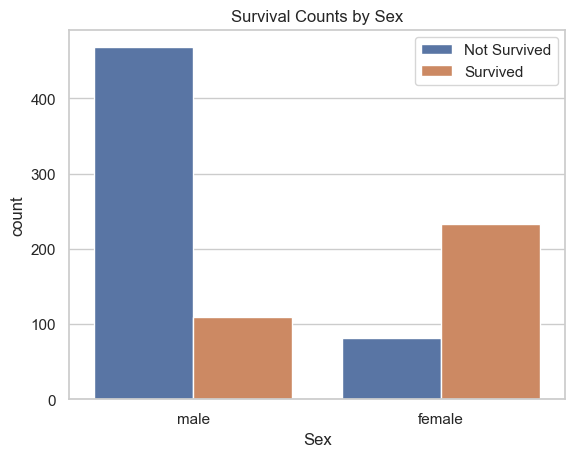

In [15]:
countplot(df,'Sex')

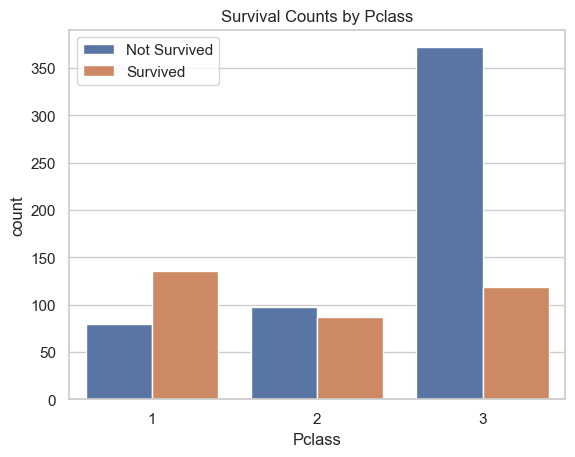

In [16]:
countplot(df,'Pclass')

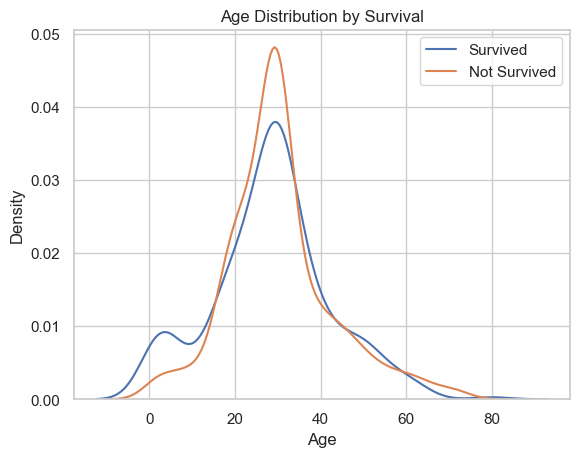

In [17]:
sns.kdeplot(data=df[df['Survived']==1]['Age'])
sns.kdeplot(data=df[df['Survived']==0]['Age'])
plt.title("Age Distribution by Survival")
plt.legend(['Survived','Not Survived'])
plt.show()

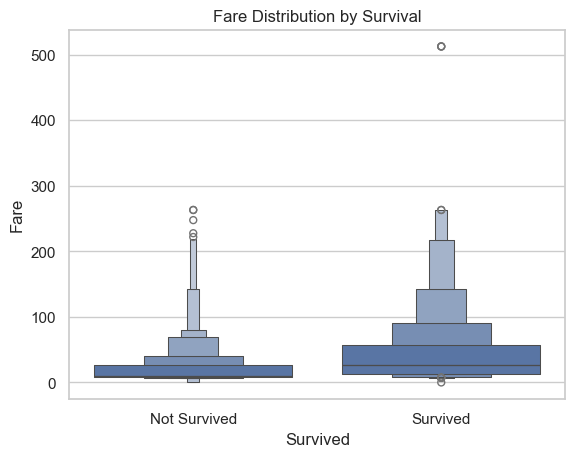

In [18]:
sns.boxenplot(x='Survived',y='Fare',data=df)
plt.title("Fare Distribution by Survival")
plt.xticks([0,1],["Not Survived","Survived"])
plt.show()

# data preprocessing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE


In [21]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [24]:
y_train.value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

In [25]:
le = LabelEncoder()

In [26]:
x_train['Sex_enc']=le.fit_transform(x_train['Sex'].to_numpy().reshape(-1, 1))
x_test['Sex_enc'] = le.transform(x_test['Sex'].to_numpy().reshape(-1,1))


In [27]:
x_train=x_train.drop(columns='Sex')
x_test=x_test.drop(columns='Sex')

In [28]:
x_train['Sex_enc'].value_counts()

Sex_enc
1    467
0    245
Name: count, dtype: int64

In [29]:
Scale=StandardScaler()
x_train=Scale.fit_transform(x_train)
x_test=Scale.transform(x_test)

In [30]:
smote=SMOTE(random_state=42)
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)

In [33]:
x_train_res.shape

(888, 6)

In [34]:
x_train_array = np.asarray(x_train_res, dtype = 'float')

y_train_array = np.asarray(y_train_res, dtype = 'int')

x_test_array = np.asarray(x_test, dtype = 'float')

y_test_array = np.asarray(y_test, dtype = 'int')

In [35]:
print(x_train_array.shape)

print(y_train_array.shape)

print(x_test_array.shape)

print(y_test_array.shape)

(888, 6)
(888,)
(179, 6)
(179,)


In [36]:
x_train_tensor=torch.tensor(x_train_array , dtype=torch.float32)
x_test_tensor=torch.tensor(x_test_array , dtype =torch.float32)
y_train_tensor=torch.tensor(y_train_array,dtype=torch.float32).unsqueeze(1)
y_test_tensor=torch.tensor(y_test_array,dtype=torch.float32).unsqueeze(1)

In [37]:
print(x_train_tensor.shape)

print(y_train_tensor.shape)

print(x_test_tensor.shape)

print(y_test_tensor.shape)

torch.Size([888, 6])
torch.Size([888, 1])
torch.Size([179, 6])
torch.Size([179, 1])


In [38]:
class SurvivalNN(nn.Module):
    def __init__(self, input_dim):
        super(SurvivalNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1)

        )

    def forward(self, x):
        return self.model(x)

input_dim = x_train.shape[1]
model = SurvivalNN(input_dim)

In [39]:

neg=(y_train_tensor==0).sum()
pos=(y_train_tensor==1).sum()
pos_weight=torch.tensor([neg/pos],dtype=torch.float32)

In [40]:
loss_fn=nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [41]:
epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(x_train_tensor)
    loss = loss_fn(output, y_train_tensor)

    loss.backward()
    optimizer.step()

    predicted = (output > 0.5).float()
    correct = (predicted == y_train_tensor).float().sum()
    acc = correct / y_train_tensor.shape[0]

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc.item():.4f}")

Epoch 1/300, Loss: 0.6986, Accuracy: 0.5000
Epoch 2/300, Loss: 0.6958, Accuracy: 0.5000
Epoch 3/300, Loss: 0.6931, Accuracy: 0.5000
Epoch 4/300, Loss: 0.6906, Accuracy: 0.5000
Epoch 5/300, Loss: 0.6881, Accuracy: 0.5000
Epoch 6/300, Loss: 0.6857, Accuracy: 0.5000
Epoch 7/300, Loss: 0.6833, Accuracy: 0.5000
Epoch 8/300, Loss: 0.6810, Accuracy: 0.5000
Epoch 9/300, Loss: 0.6786, Accuracy: 0.5000
Epoch 10/300, Loss: 0.6762, Accuracy: 0.5000
Epoch 11/300, Loss: 0.6738, Accuracy: 0.5045
Epoch 12/300, Loss: 0.6712, Accuracy: 0.5045
Epoch 13/300, Loss: 0.6686, Accuracy: 0.5045
Epoch 14/300, Loss: 0.6659, Accuracy: 0.5045
Epoch 15/300, Loss: 0.6631, Accuracy: 0.5045
Epoch 16/300, Loss: 0.6602, Accuracy: 0.5045
Epoch 17/300, Loss: 0.6571, Accuracy: 0.5045
Epoch 18/300, Loss: 0.6538, Accuracy: 0.5056
Epoch 19/300, Loss: 0.6504, Accuracy: 0.5101
Epoch 20/300, Loss: 0.6468, Accuracy: 0.5101
Epoch 21/300, Loss: 0.6430, Accuracy: 0.5113
Epoch 22/300, Loss: 0.6391, Accuracy: 0.5146
Epoch 23/300, Loss:

In [43]:
torch.save(model.state_dict(), 'models/Survival_NN.pth')

In [44]:
model.eval()
with torch.no_grad():
    test_output = model(x_test_tensor)
    test_predicted = (test_output > 0.5).float()
    test_correct = (test_predicted == y_test_tensor).float().sum()
    test_acc = test_correct / y_test_tensor.shape[0]

print(f"Test Accuracy: {test_acc.item():.4f}")

Test Accuracy: 0.8156


In [46]:
import torch.onnx

dummy_input = torch.randn(1, input_dim)

# export the model

torch.onnx.export(model,
                 dummy_input,
                'models/Survival_NN.onnx',
                export_params=True,
                opset_version=11,
                do_constant_folding=True,
                input_names=['input'],
                output_names=['output'],
                dynamic_axes={'input': {0: 'batch_size'},
                'output': {0: 'batch_size'}})